[Link](https://apmonitor.com/do/index.php/Main/EstimatorTuning) for this hw. This homework is mostly meant to give some experience with different tuning knobs that are used with Moving Horizon Estimation. 

# Widget

# Exercise

Objective: Design an estimator to predict an unknown parameters so that a simple model is able to predict the response of a more complex process. Tune the estimator to achieve either tracking or predictive performance.

[]

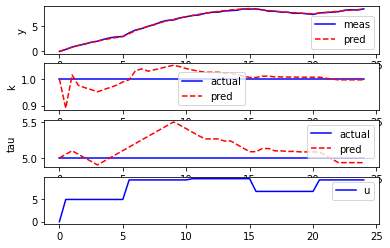

In [22]:
import numpy as np
from random import random
from gekko import GEKKO
import matplotlib.pyplot as plt

n = 1 # process model order

#%% Process
# Change to True for MacOS
rmt = False 
p = GEKKO(remote=rmt)
p.time = [0,.5]

#Parameters
p.u = p.MV(value=0)
p.K = p.Param(value=1) #gain
p.tau = p.Param(value=5) #time constant

#Intermediate
p.x = [p.Intermediate(p.u)]

#Variables
p.x.extend([p.Var() for _ in range(n)])  #state variables
p.y = p.SV() #measurement

#Equations
p.Equations([p.tau/n * p.x[i+1].dt() == -p.x[i+1] + p.x[i] for i in range(n)])
p.Equation(p.y == p.K * p.x[n])

#options
p.options.IMODE = 4

#%% Model
m = GEKKO(remote=rmt)
#0-20 by 0.5 -- discretization must match simulation
m.time = np.linspace(0,20,41)

#Parameters
m.u = m.MV() #input
m.K = m.FV(value=1, lb=0.3, ub=3) #gain
m.tau = m.FV(value=5, lb=1, ub=10) #time constant

#Variables
m.x = m.SV() #state variable
m.y = m.CV() #measurement

#Equations
m.Equations([m.tau * m.x.dt() == -m.x + m.u, 
             m.y == m.K * m.x])

#Options
m.options.IMODE = 5 #MHE
m.options.EV_TYPE = 1

# STATUS = 0, optimizer doesn't adjust value
# STATUS = 1, optimizer can adjust
m.u.STATUS = 0
m.K.STATUS = 1
m.tau.STATUS = 1

# FSTATUS = 0, no measurement
# FSTATUS = 1, measurement used to update model
m.u.FSTATUS = 1
m.K.FSTATUS = 0
m.tau.FSTATUS = 0
m.y.FSTATUS = 1

# DMAX = maximum movement each cycle
m.K.DMAX = 1
m.tau.DMAX = .05

# MEAS_GAP = dead-band for measurement / model mismatch
m.y.MEAS_GAP = 0.0

#%% problem configuration
# number of cycles
cycles = 50
# time vector
tm = np.linspace(0,25,51)
# noise level
noise = 0.25

# values of u change randomly over time every 10th step
u_meas = np.zeros(cycles)
step_u = 0
for i in range(0,cycles):
    if ((i-1)%10) == 0:
        # random step (-5 to 5)
        step_u = step_u + (random()-0.5)*10
    u_meas[i] = step_u

#%% run process and estimator for cycles
y_meas = np.zeros(cycles)
y_est = np.zeros(cycles)
k_est = np.zeros(cycles)*np.nan
tau_est = np.zeros(cycles)*np.nan
for i in range(cycles-1):
    # process simulator
    p.u.MEAS = u_meas[i]
    p.solve(disp=False)
    r = (random()-0.5)*noise
    y_meas[i] = p.y.value[1] + r # add noise

    # estimator
    m.u.MEAS = u_meas[i]
    m.y.MEAS = y_meas[i]
    m.solve(disp=False)
    y_est[i] = m.y.MODEL 
    k_est[i] = m.K.NEWVAL 
    tau_est[i] = m.tau.NEWVAL 

    plt.clf()
    plt.subplot(4,1,1)
    plt.plot(tm[0:i+1],y_meas[0:i+1],'b-')
    plt.plot(tm[0:i+1],y_est[0:i+1],'r--')
    plt.legend(('meas','pred'))
    plt.ylabel('y')
    plt.subplot(4,1,2)
    plt.plot(tm[0:i+1],np.ones(i+1)*p.K.value[0],'b-')
    plt.plot(tm[0:i+1],k_est[0:i+1],'r--')
    plt.legend(('actual','pred'))
    plt.ylabel('k')
    plt.subplot(4,1,3)
    plt.plot(tm[0:i+1],np.ones(i+1)*p.tau.value[0],'b-')
    plt.plot(tm[0:i+1],tau_est[0:i+1],'r--')
    plt.legend(('actual','pred'))
    plt.ylabel('tau')
    plt.subplot(4,1,4)
    plt.plot(tm[0:i+1],u_meas[0:i+1],'b-')
    plt.legend('u')

plt.plot()

## 2nd order

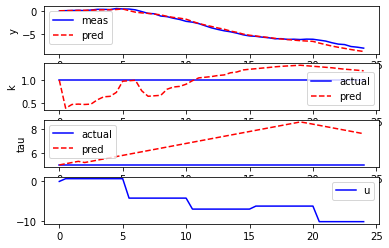

In [20]:

n = 2 # process model order

#%% Process
# Change to True for MacOS
rmt = False 
p = GEKKO(remote=rmt)
p.time = [0,.5]

#Parameters
p.u = p.MV(value=0)
p.K = p.Param(value=1) #gain
p.tau = p.Param(value=5) #time constant

#Intermediate
p.x = [p.Intermediate(p.u)]

#Variables
p.x.extend([p.Var() for _ in range(n)])  #state variables
p.y = p.SV() #measurement

#Equations
p.Equations([p.tau/n * p.x[i+1].dt() == -p.x[i+1] + p.x[i] for i in range(n)])
p.Equation(p.y == p.K * p.x[n])

#options
p.options.IMODE = 4

#%% Model
m = GEKKO(remote=rmt)
#0-20 by 0.5 -- discretization must match simulation
m.time = np.linspace(0,20,41)

#Parameters
m.u = m.MV() #input
m.K = m.FV(value=1, lb=0.3, ub=3) #gain
m.tau = m.FV(value=5, lb=1, ub=10) #time constant

#Variables
m.x = m.SV() #state variable
m.y = m.CV() #measurement

#Equations
m.Equations([m.tau * m.x.dt() == -m.x + m.u, 
             m.y == m.K * m.x])

#Options
m.options.IMODE = 5 #MHE
m.options.EV_TYPE = 1

# STATUS = 0, optimizer doesn't adjust value
# STATUS = 1, optimizer can adjust
m.u.STATUS = 0
m.K.STATUS = 1
m.tau.STATUS = 1

# FSTATUS = 0, no measurement
# FSTATUS = 1, measurement used to update model
m.u.FSTATUS = 1
m.K.FSTATUS = 0
m.tau.FSTATUS = 0
m.y.FSTATUS = 1


## TUNING PARAMS HERE ##
# DMAX = maximum movement each cycle
m.K.DMAX = 1
m.tau.DMAX = .1



# MEAS_GAP = dead-band for measurement / model mismatch
m.y.MEAS_GAP = 0.0
m.y.COST = 0.0 #penalizes value of y.

#%% problem configuration
# number of cycles
cycles = 50
# time vector
tm = np.linspace(0,25,51)
# noise level
noise = 0.25

# values of u change randomly over time every 10th step
u_meas = np.zeros(cycles)
step_u = 0
for i in range(0,cycles):
    if ((i-1)%10) == 0:
        # random step (-5 to 5)
        step_u = step_u + (random()-0.5)*10
    u_meas[i] = step_u

#%% run process and estimator for cycles
y_meas = np.zeros(cycles)
y_est = np.zeros(cycles)
k_est = np.zeros(cycles)*np.nan
tau_est = np.zeros(cycles)*np.nan
for i in range(cycles-1):
    # process simulator
    p.u.MEAS = u_meas[i]
    p.solve(disp=False)
    r = (random()-0.5)*noise
    y_meas[i] = p.y.value[1] + r # add noise

    # estimator
    m.u.MEAS = u_meas[i]
    m.y.MEAS = y_meas[i]
    m.solve(disp=False)
    y_est[i] = m.y.MODEL 
    k_est[i] = m.K.NEWVAL 
    tau_est[i] = m.tau.NEWVAL 

    plt.clf()
    plt.subplot(4,1,1)
    plt.plot(tm[0:i+1],y_meas[0:i+1],'b-')
    plt.plot(tm[0:i+1],y_est[0:i+1],'r--')
    plt.legend(('meas','pred'))
    plt.ylabel('y')
    plt.subplot(4,1,2)
    plt.plot(tm[0:i+1],np.ones(i+1)*p.K.value[0],'b-')
    plt.plot(tm[0:i+1],k_est[0:i+1],'r--')
    plt.legend(('actual','pred'))
    plt.ylabel('k')
    plt.subplot(4,1,3)
    plt.plot(tm[0:i+1],np.ones(i+1)*p.tau.value[0],'b-')
    plt.plot(tm[0:i+1],tau_est[0:i+1],'r--')
    plt.legend(('actual','pred'))
    plt.ylabel('tau')
    plt.subplot(4,1,4)
    plt.plot(tm[0:i+1],u_meas[0:i+1],'b-')
    plt.legend('u')

plt.show()

## 10th Order

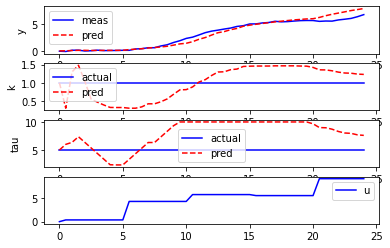

In [26]:
n = 10 # process model order

#%% Process
# Change to True for MacOS
rmt = False 
p = GEKKO(remote=rmt)
p.time = [0,.5]

#Parameters
p.u = p.MV(value=0)
p.K = p.Param(value=1) #gain
p.tau = p.Param(value=5) #time constant

#Intermediate
p.x = [p.Intermediate(p.u)]

#Variables
p.x.extend([p.Var() for _ in range(n)])  #state variables
p.y = p.SV() #measurement

#Equations
p.Equations([p.tau/n * p.x[i+1].dt() == -p.x[i+1] + p.x[i] for i in range(n)])
p.Equation(p.y == p.K * p.x[n])

#options
p.options.IMODE = 4

#%% Model
m = GEKKO(remote=rmt)
#0-20 by 0.5 -- discretization must match simulation
m.time = np.linspace(0,20,41)

#Parameters
m.u = m.MV() #input
m.K = m.FV(value=1, lb=0.3, ub=3) #gain
m.tau = m.FV(value=5, lb=1, ub=10) #time constant

#Variables
m.x = m.SV() #state variable
m.y = m.CV() #measurement

#Equations
m.Equations([m.tau * m.x.dt() == -m.x + m.u, 
             m.y == m.K * m.x])

#Options
m.options.IMODE = 5 #MHE
m.options.EV_TYPE = 1

# STATUS = 0, optimizer doesn't adjust value
# STATUS = 1, optimizer can adjust
m.u.STATUS = 0
m.K.STATUS = 1
m.tau.STATUS = 1

# FSTATUS = 0, no measurement
# FSTATUS = 1, measurement used to update model
m.u.FSTATUS = 1
m.K.FSTATUS = 0
m.tau.FSTATUS = 0
m.y.FSTATUS = 1

# DMAX = maximum movement each cycle
m.K.DMAX = 1
m.tau.DMAX = 1

# MEAS_GAP = dead-band for measurement / model mismatch
m.y.MEAS_GAP = 0.1

#%% problem configuration
# number of cycles
cycles = 50
# time vector
tm = np.linspace(0,25,51)
# noise level
noise = 0.25

# values of u change randomly over time every 10th step
u_meas = np.zeros(cycles)
step_u = 0
for i in range(0,cycles):
    if ((i-1)%10) == 0:
        # random step (-5 to 5)
        step_u = step_u + (random()-0.5)*10
    u_meas[i] = step_u

#%% run process and estimator for cycles
y_meas = np.zeros(cycles)
y_est = np.zeros(cycles)
k_est = np.zeros(cycles)*np.nan
tau_est = np.zeros(cycles)*np.nan
for i in range(cycles-1):
    # process simulator
    p.u.MEAS = u_meas[i]
    p.solve(disp=False)
    r = (random()-0.5)*noise
    y_meas[i] = p.y.value[1] + r # add noise

    # estimator
    m.u.MEAS = u_meas[i]
    m.y.MEAS = y_meas[i]
    m.solve(disp=False)
    y_est[i] = m.y.MODEL 
    k_est[i] = m.K.NEWVAL 
    tau_est[i] = m.tau.NEWVAL 

    plt.clf()
    plt.subplot(4,1,1)
    plt.plot(tm[0:i+1],y_meas[0:i+1],'b-')
    plt.plot(tm[0:i+1],y_est[0:i+1],'r--')
    plt.legend(('meas','pred'))
    plt.ylabel('y')
    plt.subplot(4,1,2)
    plt.plot(tm[0:i+1],np.ones(i+1)*p.K.value[0],'b-')
    plt.plot(tm[0:i+1],k_est[0:i+1],'r--')
    plt.legend(('actual','pred'))
    plt.ylabel('k')
    plt.subplot(4,1,3)
    plt.plot(tm[0:i+1],np.ones(i+1)*p.tau.value[0],'b-')
    plt.plot(tm[0:i+1],tau_est[0:i+1],'r--')
    plt.legend(('actual','pred'))
    plt.ylabel('tau')
    plt.subplot(4,1,4)
    plt.plot(tm[0:i+1],u_meas[0:i+1],'b-')
    plt.legend('u')

plt.show()

Measurement gap is more important on the 10th order because I just can't fit to everything. Letting parameters move more gets better estimation in general it seems. 